## $$不用框架入门进阶深度学习(2)-手写感知器做二分类$$
### 一、鸢尾花数据集介绍

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载鸢尾花数据集
iris = load_iris()
# iris.data包含一个(150, 4)的数据，设置列名为iris.feature_names
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# iris.target为类别标签(150, 1)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [3]:
# 数据集文档介绍
from pprint import pprint
pprint(iris)

{'DESCR': 'Iris Plants Database\n'
          '====================\n'
          '\n'
          'Notes\n'
          '-----\n'
          'Data Set Characteristics:\n'
          '    :Number of Instances: 150 (50 in each of three classes)\n'
          '    :Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          '    :Attribute Information:\n'
          '        - sepal length in cm\n'
          '        - sepal width in cm\n'
          '        - petal length in cm\n'
          '        - petal width in cm\n'
          '        - class:\n'
          '                - Iris-Setosa\n'
          '                - Iris-Versicolour\n'
          '                - Iris-Virginica\n'
          '    :Summary Statistics:\n'
          '\n'
          '    ============== ==== ==== ======= ===== ====================\n'
          '                    Min  Max   Mean    SD   Class Correlation\n'
          '    ============== ==== ==== ======= ===== ===============

In [4]:
# 数据集查看
print(df.label.value_counts())
df.head()

2    50
1    50
0    50
Name: label, dtype: int64


,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 二、特征选择

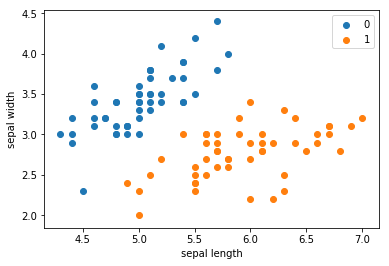

In [5]:
# 萼片组['sepal length'，'sepal width']特征分布查看
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### 三、Perceptron-用感知器完成二分类


权重更新规则：
$$
\begin{equation}
\begin{aligned}
\Delta b_i&=\delta (y- \widehat{y}) \\
\Delta w_i&=\delta (y- \widehat{y})x_i \\
w_i&=w_i + \Delta w_i\\
b_i&=b_i + \Delta b_i 
\end{aligned}
\end{equation}
$$

其中$\delta叫学习率$，y为正确的输出，$\widehat{y}为感知机预测$的结果。




In [6]:
class Perceptron(object):
    def __init__(self, input_feature_num, activation=None):
        self.activation = activation if activation else self.sign
        self.w = [0.0] * input_feature_num
        self.b = 0.0

    def sign(self, z):
        # 阶跃激活函数:
        # sign(z) = 1 if z > 0 
        # sign(z) = 0 otherwise
        return int(z>0)
    
    def predict(self, x):
        # 预测输出函数
        # y_hat = f(wx + b)
        return self.activation(
            np.dot(self.w, x) + self.b)
    
    def fit(self, x_train, y_train, iteration=10, learning_rate=0.1):
        # 训练函数
        for _ in range(iteration):
            for x, y in zip(x_train, y_train):
                y_hat = self.predict(x)
                self._update_weights(x, y, y_hat, learning_rate)
        print(self)
    
    def _update_weights(self, x, y, y_hat, learning_rate):
        # 权重更新, 对照公式查看
        delta = y - y_hat
        self.w = np.add(self.w,
                        np.multiply(learning_rate * delta, x))
        self.b += learning_rate * delta
    
    def __str__(self):
        return 'weights: {}\tbias: {}'.format(self.w, self.b)

In [7]:
# 训练数据准备
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]

In [8]:
# 训练模型
perceptron = Perceptron(input_feature_num=X.shape[1])
perceptron.fit(X, y, iteration=100, learning_rate=0.1)

weights: [ 3.87 -5.8 ]	bias: -2.600000000000001


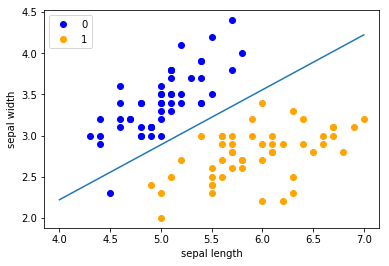

In [9]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

#### 对比sklearn

In [10]:
from sklearn.linear_model import Perceptron as SPerceptron
clf = SPerceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(X, y)
print(clf.coef_, clf.intercept_) # 打印权重

[[  74.6 -127.2]] [ 0.]


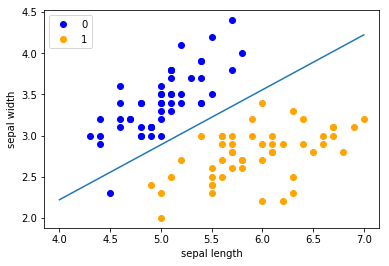

In [11]:
x_points = np.linspace(4, 7,10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### 四、作业：用petal组特征完成二分类(重点)

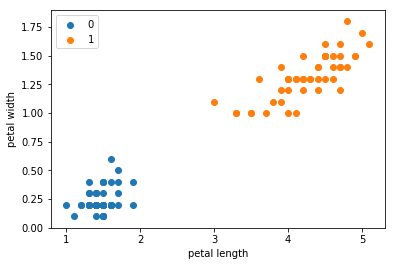

In [12]:
# 花瓣组['petal length'，'petal width']特征分布查看
plt.scatter(df[:50]['petal length'], df[:50]['petal width'], label='0')
plt.scatter(df[50:100]['petal length'], df[50:100]['petal width'], label='1')

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

In [13]:
# 训练数据准备
data = np.array(df.iloc[:100, [2, 3, -1]])
X, y = data[:,:-1], data[:,-1]

In [14]:
# Write Code here
